In [90]:
# nest
import nest
import nest.raster_plot
import nest.voltage_trace
# other
import pandas as pd
import os
import json
import time 
import timeit
import itertools
import numpy as np
from importlib import reload 
from itertools import permutations 
from itertools import combinations 
import matplotlib.pyplot as plt
import seaborn as sns

sim_params = {
        
        'N_total':1200,
        'NE': 960, # Default: 4/5 are exci neurons, 1/5 are inh neurons
        'NI': 240,
        'eps':0.1,  # connection probability
        'J_in':-96.0,
        'J_ex':6.0,
        'resolution':0.1,  # temporal resolution of simulation in ms. Kumar2008: 0.1
        'delay':1.5,  # synaptic delay in the network
        'n_threads':8,
        'stim_start':0., # start applying current (dc)
        'stim_end':100., # end applying current (dc)
        'simtime':1000., # simulation time 
        'sub_fr':0.9, # subthreshold current amplitude
        'sup_fr':1.01, # suprathreshold current amplitude
    }

model_params = {
        
        'C_m': 250.0,
        'E_L': -70.0,
        'E_ex': 0.0,
        'E_in': -80.0,
        'I_e': 0.0,
        'V_reset': -70.0,
        'V_th': -50.0,
        'g_L': 16.7,
        't_ref': 2.0, # Duration of refractory period
        'tau_syn_ex': 0.326, # Rise time of the excitatory synaptic alpha function
        'tau_syn_in': 0.326,
    }
    
syn_params_ex = {
    
        'model':'stdp_synapse',
        'lambda': 0.01,
        'alpha': 1.0,
        'delay': 1.5,
        'weight': 6.0,
        'Wmax': 100.0   
    }
    
syn_params_in = {
    
        'model':'stdp_synapse',
        'lambda': 0.01,
        'alpha': 1.0,
        'delay': 1.5,
        'weight':-95.0,
        'Wmax':-100.0  
    }

#stim_amps = [300.6, 337.34]

In [91]:
nest.ResetKernel() 
nest.SetKernelStatus({'resolution': 0.1, 'print_time': False, 'local_num_threads': 8})

In [92]:
# ====== CREATE NEURONS =========
neuron_ids = nest.Create('iaf_cond_alpha', 1, params=model_params)

#  ====== CREATE & CONFIGURE GENERATORS + DETECTORS =========
# create & configure dc generators (inputs)
dcgen = nest.Create('dc_generator')
nest.SetStatus(dcgen, {"amplitude": 300.0, "start": 0., "stop": 100.})

# create and configure spikedetector
spikedet = nest.Create('spike_detector')
nest.SetStatus(spikedet, params={"withgid": True, "withtime": True})

# create and configure multimeter that records the voltage (V_m)
multimet = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.SetStatus(multimet, params={'interval':1.})

In [93]:
# ====== CONNECT TO DEVICES =========
nest.Connect(neuron_ids, spikedet)
nest.Connect(multimet, neuron_ids)
nest.Connect(dcgen, neuron_ids)

In [94]:
#nest.ResetNetwork() # forget all previous simulation data
#nest.SetKernelStatus({'time':0.}) # turn back the clock
# simulate for a certain time period (ms)
nest.Simulate(1000.)

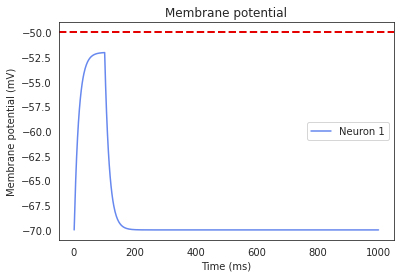

In [96]:
nest.voltage_trace.from_device(multimet)
plt.axhline(y=-50.0, linewidth=2., color='xkcd:red', linestyle='--');

In [97]:
nest.raster_plot.from_device(spikedet);

NESTError: No events recorded!